<a href="https://colab.research.google.com/github/derek-byte/Melanoma_Deep_Learning/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MobileNet

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils

from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
# %matplotlib incline

Reading Dataset

In [8]:
PATH = '/content/drive/MyDrive/Melanoma_Dataset/'
train_path = PATH + 'train/'
valid_path = PATH + 'valid/'
test_path = PATH + 'test/'

In [17]:
# Display the directories in the dataset
display(os.listdir(PATH))

['valid', 'train', 'test']

In [32]:
# Valid Directory 
print(len(os.listdir(valid_path)), "Directories of Photos in Valid")
valid_sub = os.listdir(valid_path)
image_len = 0
for folder in valid_sub:
    # Get the amount of images in each sub folder 
    print(folder, len(os.listdir(valid_path + folder +'/')))
    # Get the total amount of images in the folder
    image_len += len(os.listdir(valid_path + folder +'/'))

print("Total Valid Photos ", image_len, "\n")

# Train Directory 
print(len(os.listdir(train_path)), "Directories of Photos in Train")
train_sub = os.listdir(train_path)
image_len = 0
for folder in train_sub:
    print(folder, len(os.listdir(train_path + folder +'/')))
    image_len += len(os.listdir(train_path + folder +'/'))

print("Total Train Photos ", image_len, "\n")

# Test Directory 
print(len(os.listdir(test_path)), "Directories of Photos in Test")
test_sub = os.listdir(test_path)
image_len = 0
for folder in test_sub:
    # Get the amount of images in each sub folder 
    print(folder, len(os.listdir(test_path + folder +'/')))
    # Get the total amount of images in the folder
    image_len += len(os.listdir(test_path + folder +'/'))

print("Total Test Photos ", image_len, "\n")


2 Directories of Photos in Valid
Melanoma 1781
NotMelanoma 1781
Total Valid Photos  3562 

2 Directories of Photos in Train
NotMelanoma 5341
Melanoma 5072
Total Train Photos  10413 

2 Directories of Photos in Test
Melanoma 1781
NotMelanoma 1780
Total Test Photos  3561 



TRAIN  Melanoma  photo number  40


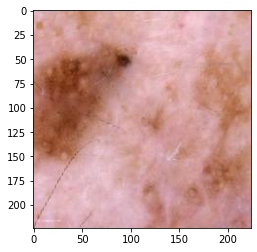

TRAIN  NotMelanoma  photo number  40


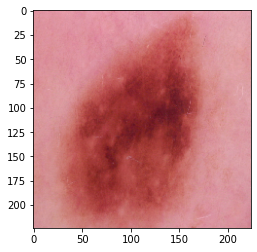

VALID  Melanoma  photo number  40


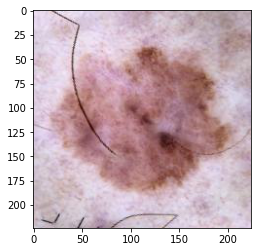

VALID  NotMelanoma  photo number  40


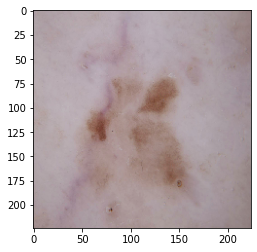

TEST  Melanoma  photo number  40


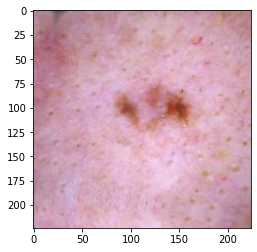

TEST  NotMelanoma  photo number  40


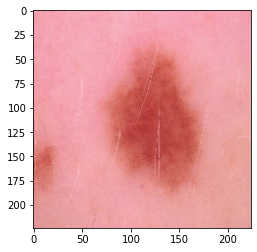

In [43]:
# Check the photos and what folder they are in 

TestNum = 40
diag1 = 'Melanoma'
diag2 = 'NotMelanoma'

# MELANOMA TRAIN
image_dir = PATHtrain +'/'+diag1+'/'
img_name = os.listdir(image_dir)[TestNum]
img_path = image_dir+str(img_name)
img = image.load_img(img_path, target_size=(224, 224))
imgplot = plt.imshow(img)
print("TRAIN ",diag1," photo number ", TestNum)
plt.show()

# NOTMELANOMA TRAIN
image_dir = PATHtrain +'/'+diag2+'/'
img_name = os.listdir(image_dir)[TestNum]
img_path = image_dir+str(img_name)
img = image.load_img(img_path, target_size=(224, 224))
imgplot = plt.imshow(img)
print("TRAIN ",diag2," photo number ", TestNum)
plt.show()


#MELANOMA VALID
image_dir = PATHvalid +'/'+diag1+'/'
img_name = os.listdir(image_dir)[TestNum]
img_path = image_dir+str(img_name)
img = image.load_img(img_path, target_size=(224, 224))
imgplot = plt.imshow(img)
print("VALID ",diag1," photo number ", TestNum)
plt.show()

#NOTMELANOMA VALID
image_dir = PATHvalid +'/'+diag2+'/'
img_name = os.listdir(image_dir)[TestNum]
img_path = image_dir+str(img_name)
img = image.load_img(img_path, target_size=(224, 224))
imgplot = plt.imshow(img)
print("VALID ",diag2," photo number ", TestNum)
plt.show()


#MELANOMA TEST
image_dir = PATHtest +'/'+diag1+'/'
img_name = os.listdir(image_dir)[TestNum]
img_path = image_dir+str(img_name)
img = image.load_img(img_path, target_size=(224, 224))
imgplot = plt.imshow(img)
print("TEST ",diag1," photo number ", TestNum)
plt.show()

#NOTMELANOMA TEST
image_dir = PATHtest +'/'+diag2+'/'
img_name = os.listdir(image_dir)[TestNum]
img_path = image_dir+str(img_name)
img = image.load_img(img_path, target_size=(224, 224))
imgplot = plt.imshow(img)
print("TEST ",diag2," photo number ", TestNum)
plt.show()

In [5]:
# # preprocessing_function=tf.keras.applications.mobilenet.preprocess_input   scales the image from 255 to be on a scale from -1 to 1 for RGB values
# train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
# valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)
# train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 10413 images belonging to 2 classes.
Found 3562 images belonging to 2 classes.
Found 3561 images belonging to 2 classes.


Model & Training

In [ ]:
model = keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4", trainable=True),
  layers.Dense(1, activation="sigmoid")
])

Modify Model

In [34]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
mobile.summary()

In [35]:
params = count_params(mobile)
assert params['non_trainable_params'] == 21888
assert params['trainable_params'] == 4231976

NameError: ignored

In [36]:
# Get the last 6 layer modules in Keras
x = mobile.layers[-6].output
# Using functional model type and to this output layer, pass all the previous layers from x
output = Dense(units=10, activation='softmax')(x)

In [37]:
model = Model(inputs=mobile.input, outputs=output)

In [38]:
# Going through all layers in model and saying that all the models except for the last 23 make it not trainable
for layer in model.layers[:-23]:
  layer.trainable = False

In [ ]:
model.summary()

In [ ]:
params = count_params(model)
assert params['non_trainable_params'] == 1103040
assert params['trainable_params'] == 2138074

Train the Model

In [ ]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Run for more epochs (~30) to see better results
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Other Stuff

In [30]:
# Download MobileNet from the Internet so you need an Internet connection
mobile = tf.keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 1s 0us/step


In [28]:
def prepare_image(file):
  img_path = "/content/drive/MyDrive/Melanoma_Dataset/test/Melanoma/"
  # Taking image size to be reconfigured to be 224 * 224 
  img = image.load_img(img_path + file, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array_expanded_dims = np.expand_dims(img_array, axis=0)
  # Get the new reconfigured image to scale all the RGB scales pixils to be from -1 to 1
  return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

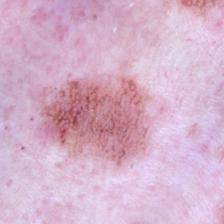

In [26]:
from IPython.display import Image
Image(filename="/content/drive/MyDrive/Melanoma_Dataset/test/Melanoma/AUG_0_11.jpeg", width=224, height=224)

In [31]:
preprocessed_image = prepare_image('AUG_0_11.jpeg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

49152/35363 [=========================================] - 0s 0us/step


[[('n03314780', 'face_powder', 0.39016253),
  ('n03485794', 'handkerchief', 0.09317512),
  ('n02219486', 'ant', 0.084848605),
  ('n03887697', 'paper_towel', 0.051789187),
  ('n07930864', 'cup', 0.029257)]]

In [ ]:
assert results[0][0][1] == 'skin_cancer'